# Attention with scalar hidden states

In [897]:
import torch

In [898]:
seq_len = 4
hidden_dim = 1

In [899]:
x = torch.randn(seq_len)
print(x.shape)
x

torch.Size([4])


tensor([ 0.6305,  1.2756, -0.1905, -0.2844])

In [900]:
x = x.repeat(seq_len, 1)
print(x.shape)
x

torch.Size([4, 4])


tensor([[ 0.6305,  1.2756, -0.1905, -0.2844],
        [ 0.6305,  1.2756, -0.1905, -0.2844],
        [ 0.6305,  1.2756, -0.1905, -0.2844],
        [ 0.6305,  1.2756, -0.1905, -0.2844]])

In [901]:
mask = torch.tril(torch.ones(x.shape[0], x.shape[0]))
print(mask.shape)
mask

torch.Size([4, 4])


tensor([[1., 0., 0., 0.],
        [1., 1., 0., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 1.]])

In [902]:
masked = torch.mul(mask, x)
print(masked.shape)
masked

torch.Size([4, 4])


tensor([[ 0.6305,  0.0000, -0.0000, -0.0000],
        [ 0.6305,  1.2756, -0.0000, -0.0000],
        [ 0.6305,  1.2756, -0.1905, -0.0000],
        [ 0.6305,  1.2756, -0.1905, -0.2844]])

In [903]:
attention_dim = 2
w_a = torch.randn(hidden_dim, attention_dim)
tanh = torch.nn.Tanh()
key = tanh(torch.matmul(masked.unsqueeze(-1), w_a))
print(key.shape)
key

torch.Size([4, 4, 2])


tensor([[[-0.3779, -0.3538],
         [-0.0000, -0.0000],
         [ 0.0000,  0.0000],
         [ 0.0000,  0.0000]],

        [[-0.3779, -0.3538],
         [-0.6666, -0.6340],
         [ 0.0000,  0.0000],
         [ 0.0000,  0.0000]],

        [[-0.3779, -0.3538],
         [-0.6666, -0.6340],
         [ 0.1196,  0.1112],
         [ 0.0000,  0.0000]],

        [[-0.3779, -0.3538],
         [-0.6666, -0.6340],
         [ 0.1196,  0.1112],
         [ 0.1775,  0.1653]]])

In [904]:
softmax = torch.nn.Softmax(dim=-1)
q = torch.randn(1, attention_dim)
temp = torch.matmul(q, key.transpose(1, 2))
print(temp.shape)
temp

torch.Size([4, 1, 4])


tensor([[[ 0.2585,  0.0000,  0.0000,  0.0000]],

        [[ 0.2585,  0.4483,  0.0000,  0.0000]],

        [[ 0.2585,  0.4483, -0.0823,  0.0000]],

        [[ 0.2585,  0.4483, -0.0823, -0.1220]]])

In [905]:
softmax_mask = ((torch.tril(torch.ones(temp.shape[0], temp.shape[0]), diagonal=0) != 1) * -float('inf')).nan_to_num(nan=0)
softmax_mask = softmax_mask.unsqueeze(1)
softmax_mask

tensor([[[ 0.0000e+00, -3.4028e+38, -3.4028e+38, -3.4028e+38]],

        [[ 0.0000e+00,  0.0000e+00, -3.4028e+38, -3.4028e+38]],

        [[ 0.0000e+00,  0.0000e+00,  0.0000e+00, -3.4028e+38]],

        [[ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00]]])

In [906]:
temp = temp + softmax_mask
temp

tensor([[[ 2.5846e-01, -3.4028e+38, -3.4028e+38, -3.4028e+38]],

        [[ 2.5846e-01,  4.4832e-01, -3.4028e+38, -3.4028e+38]],

        [[ 2.5846e-01,  4.4832e-01, -8.2262e-02, -3.4028e+38]],

        [[ 2.5846e-01,  4.4832e-01, -8.2262e-02, -1.2203e-01]]])

In [907]:
d = softmax(temp)
print(d.shape)
d.squeeze()

torch.Size([4, 1, 4])


tensor([[1.0000, 0.0000, 0.0000, 0.0000],
        [0.4527, 0.5473, 0.0000, 0.0000],
        [0.3424, 0.4140, 0.2436, 0.0000],
        [0.2775, 0.3355, 0.1974, 0.1897]])

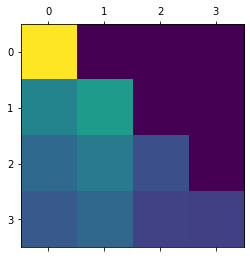

In [908]:
import matplotlib.pyplot as plt
plt.matshow(d.squeeze())
plt.show()

In [909]:
a = torch.matmul(d, masked.unsqueeze(-1))
print(a.shape)
a.squeeze()

torch.Size([4, 1, 1])


tensor([0.6305, 0.9836, 0.6977, 0.5114])